# Severe Weather - Modeling

Greg Welliver   

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as plticker
import seaborn as sns
sns.set()
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
import warnings
from scipy import stats
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import lightgbm as lgb
from lightgbm import LGBMRegressor
from numpy import mean
from numpy import std
from functools import partial
%matplotlib inline
from sklearn.linear_model import GammaRegressor
from sklearn.linear_model import TweedieRegressor

import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from scipy import stats

from sklearn.datasets import fetch_openml
from sklearn import linear_model, preprocessing, tree, svm, datasets, metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, f1_score, log_loss
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

import xgboost
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import warnings
from subprocess import call
from IPython.display import Image
from datetime import datetime, timedelta, date
import os
import plotly.graph_objects as go
import itertools
from io import StringIO  
import pydotplus

# Seaborn settings
sns.set_context('notebook')
#sns.set_style("whitegrid")
#sns.set_style("white")
style_set = sns.set_style('whitegrid')
pd.options.display.float_format = '{:,}'.format
color_choice1 = 'plum'
color_choice2 = 'lightblue'
color_choice3 = 'lightgreen'
#ax.yaxis.set_major_formatter('{x:,.0f}')
#sns.set_context('notebook', font_scale = 4)


%matplotlib inline
import pandas as pd
#from mpl_toolkits.basemap import Basemap


import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx

from sklearn.feature_extraction.text import CountVectorizer

## Load the data



In [2]:
# load the data
X_train = pd.read_parquet("../Data/X_train.pqt")
X_test = pd.read_parquet("../Data/X_test.pqt")
y_train = pd.read_parquet("../Data/y_train.pqt") 
y_test = pd.read_parquet("../Data/y_test.pqt")

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

# , index_col =[0]
# load data
#df = pd.read_parquet("../Data/all_storm_data11.pqt")
#df = pd.read_csv("../Data/all_storm_data4.csv")

In [3]:
# X_train = X_train.dropna(axis=0)
# X_test = X_test.dropna(axis=0)
# y_train = y_train.dropna(axis=0)
# y_test = y_test.dropna(axis=0)
# X_train = X_train.dropna(axis=0).reset_index()
# X_test = X_test.dropna(axis=0).reset_index()
# y_train = y_train.dropna(axis=0).reset_index()
# y_test = y_test.dropna(axis=0).reset_index()


## Property Damage Mean and Median

- without removal of outliers and zeroes:
mean      93,051.5
median 0

- after removing all zeroes:
mean    1,527,410.3
median 8000.0

- after removing all zeroes and 513 outliers:
mean 312,800.4
median 8000.0




# <font color='orange'>Random Forest Model</font>


In [4]:

# set the parameter grid
param_grid = {
    'n_estimators': [25, 50, 100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    'criterion': ['mse', 'mae', 'rmse']
}

In [5]:
#markdown since it takes so long to run
# random_search = RandomizedSearchCV(RandomForestRegressor(random_state=1234),
#                                    param_grid, n_jobs=-1)
# random_search.fit(X_train, y_train.values.ravel())
# print(random_search.best_estimator_)

output: 
RandomForestRegressor(max_depth=3, max_features='log2', max_leaf_nodes=3,
                      n_estimators=150, random_state=1234)

In [6]:
#rf_reg = RandomForestRegressor(**random_search.best_params_, random_state=1234)
rf_reg = RandomForestRegressor(max_depth=3, max_features='log2', max_leaf_nodes=3, n_estimators=150, random_state=1234)
rf_reg.fit(X_train, y_train.values.ravel())

y_pred = rf_reg.predict(X_train)
print('TRAIN:')
print('MAE: ', f"{mean_absolute_error(y_train, y_pred):,.1f}")
print('MSE: ', f"{mean_squared_error(y_train, y_pred):,.1f}")
print('RMSE:', f"{np.sqrt(mean_squared_error(y_train, y_pred)):,.1f}")
print('MAPE: ', f"{mean_absolute_percentage_error(y_train, y_pred):,.1f}")
train_mae = mean_absolute_error(y_train, y_pred)

print("")
y_pred = rf_reg.predict(X_test)
print('TEST:')
print('MAE: ', f"{mean_absolute_error(y_test, y_pred):,.1f}")
print('MSE: ', f"{mean_squared_error(y_test, y_pred):,.1f}")
print('RMSE:', f"{np.sqrt(mean_squared_error(y_test, y_pred)):,.1f}")
print('MAPE: ', f"{mean_absolute_percentage_error(y_test, y_pred):,.1f}")
test_mae = mean_absolute_error(y_test, y_pred)

print("")
print('MAE DIFF:', f"{((test_mae / train_mae) - 1):.0%}")

TRAIN:
MAE:  120,451.8
MSE:  1,999,883,090,601.3
RMSE: 1,414,172.2
MAPE:  197,682,557,451,555,930,112.0

TEST:
MAE:  127,555.4
MSE:  2,307,306,723,659.4
RMSE: 1,518,982.1
MAPE:  196,858,049,520,711,499,776.0

MAE DIFF: 6%


First run of model scores:
- MAE:  382342.13392639376
- MSE:  433806680086561.1
- RMSE: 20828026.312796928

Run scores after removing all zeroes:
- MAE:  1058028.2120366283
- MSE:  282319113846858.0
- RMSE: 16802354.41379743

Run scores after removing all zeros & top 100 property damage:
- MAE:  672445.1295545553
- MSE:  62743486924408.66
- RMSE: 7921078.64652338



Run scores after removing all zeros & top 513 property damage:
- MAE:  360790.7620309122
- MSE:  6576707506908.43
- RMSE: 2564509.213652474

Run scores after removing top 513 property damage, but keeping zeros:
- MAE:  128216.0747687478
- MSE:  2368120587705.116
- RMSE: 1538869.9060366072


#### This is the best performing model thus far

## Now try removing some features

Run scores after removing top 513 property damage, but keeping zeros, also removed BEGIN_TIME and STATE:
- MAE:  126899.99535687851
- MSE:  2353421245122.234
- RMSE: 1534086.4529491921


Run scores after removing top 513 property damage, but keeping zeros, also removed BEGIN_TIME and STATE, POPULATION:
- MAE:  127842.28097925895
- MSE:  2309709183925.319
- RMSE: 1519772.7408811222



Run scores after removing top 513 property damage, but keeping zeros, also removed BEGIN_TIME and STATE, POPULATION, DEATHS_INDIRECT:

- MAE:  127555.39336944176
- MSE:  2307306723659.416
- RMSE: 1518982.1340817066

#### This is the best performing model thus far

## double check if this data is all storms, and or just severe storms

## question -  do principal components analysis? other ways to eliminate variables faster?

## question -  how think about these scores?

## question - hyperparameter tuning - how do you know which parameters are important to tune, which aren't?

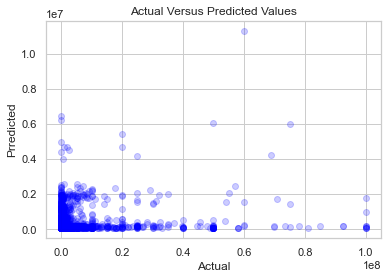

In [7]:
plt.scatter(y_test, y_pred, color = 'blue', alpha=0.2)
plt.title('Actual Versus Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Prredicted')
plt.show() 

Plot on logarithmic scale

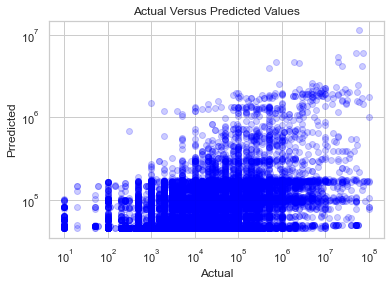

In [8]:
plt.scatter(y_test, y_pred, color = 'blue', alpha=0.2)
plt.title('Actual Versus Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Prredicted')
plt.xscale("log")
plt.yscale("log")
plt.show()

23


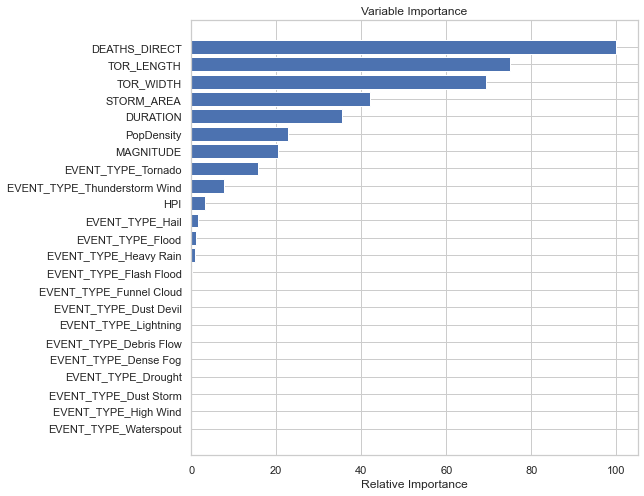

In [9]:
feature_importance = rf_reg.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(8,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# <font color='orange'>Light GBM</font>

In [10]:
# define the model
lgbm = LGBMRegressor(random_state=1234)
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_train)
print('TRAIN:')
print('MAE: ', f"{mean_absolute_error(y_train, y_pred):,.1f}")
print('MSE: ', f"{mean_squared_error(y_train, y_pred):,.1f}")
print('RMSE:', f"{np.sqrt(mean_squared_error(y_train, y_pred)):,.1f}")
print('MAPE: ', f"{mean_absolute_percentage_error(y_train, y_pred):,.1f}")
train_mae = mean_absolute_error(y_train, y_pred)

print("")
y_pred = lgbm.predict(X_test)
print('TEST:')
print('MAE: ', f"{mean_absolute_error(y_test, y_pred):,.1f}")
print('MSE: ', f"{mean_squared_error(y_test, y_pred):,.1f}")
print('RMSE:', f"{np.sqrt(mean_squared_error(y_test, y_pred)):,.1f}")
print('MAPE: ', f"{mean_absolute_percentage_error(y_test, y_pred):,.1f}")
test_mae = mean_absolute_error(y_test, y_pred)

print("")
print('MAE DIFF:', f"{((test_mae / train_mae) - 1):.0%}")

TRAIN:
MAE:  98,278.1
MSE:  1,432,965,828,530.6
RMSE: 1,197,065.5
MAPE:  140,881,634,422,085,238,784.0

TEST:
MAE:  113,067.3
MSE:  2,055,152,391,270.1
RMSE: 1,433,580.3
MAPE:  147,652,534,053,244,108,800.0

MAE DIFF: 15%


Text(0, 0.5, 'Predicted')

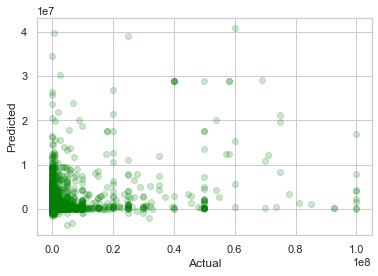

In [11]:
plt.scatter(y_test, y_pred, c='green', alpha=0.2)
plt.xlabel("Actual")
plt.ylabel("Predicted")

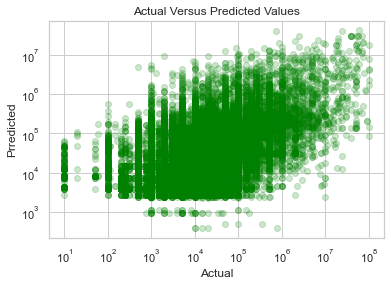

In [12]:
plt.scatter(y_test, y_pred, color = 'green', alpha=0.2)
plt.title('Actual Versus Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Prredicted')
plt.xscale("log")
plt.yscale("log")
plt.show()

With this baseline, let's see how we can improve with hyperparameter tuning

In [13]:
param_grid = {
    'learning_rate': [0.1, 0.3, 0.6, 0.9, .95],
    'max_depth': [2, 3, 6, 9, 11],
    'n_estimators': [50, 100, 150],
    'num_leaves': [50, 100, 150, 200, 250],
    'bagging_fraction': [.1, .3, .5, .8],
    'feature_fraction': [.1, .3, .5, .8],
    'max_bin': [2, 3, 5, 7, 9],    
}

[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Unknown parameter: max_leaf_nodes

In [14]:
# markdown since it takes so long to run
# random_search = RandomizedSearchCV(LGBMRegressor(random_state=1234),
#                                    param_grid, n_jobs=-1)
# random_search.fit(X_train, y_train.values.ravel())
# print(random_search.best_estimator_)

Note from article: The rule of thumb is to set early_stopping_rounds at 10% of your num_iterations.



Output of random_search 1:

LGBMRegressor(bagging_fraction=0.3, feature_fraction=0.3, learning_rate=0.9,
              max_bin=5, max_depth=9, num_iterations=6, num_leaves=150,
              random_state=1234)

Output of random search 2:
    
LGBMRegressor(bagging_fraction=0.1, feature_fraction=0.5, learning_rate=0.95,
              max_bin=7, max_depth=3, num_iterations=100, num_leaves=200,
              random_state=1234)

Output of random search 3:

LGBMRegressor(bagging_fraction=0.5, feature_fraction=0.8, learning_rate=0.3,
              max_bin=9, max_depth=3, num_iterations=150, num_leaves=250,
              random_state=1234)    

In [15]:
# define the model
lgbm2 = LGBMRegressor(bagging_fraction=0.3, feature_fraction=0.5, learning_rate=0.6,
              max_bin=9, max_depth=6, n_estimators=150, num_leaves=250,
              random_state=1234)
lgbm2.fit(X_train, y_train)

y_pred = lgbm2.predict(X_train)
print('TRAIN:')
print('MAE: ', f"{mean_absolute_error(y_train, y_pred):,.1f}")
print('MSE: ', f"{mean_squared_error(y_train, y_pred):,.1f}")
print('RMSE:', f"{np.sqrt(mean_squared_error(y_train, y_pred)):,.1f}")
print('MAPE: ', f"{mean_absolute_percentage_error(y_train, y_pred):,.1f}")
train_mae = mean_absolute_error(y_train, y_pred)

print("")
y_pred = lgbm2.predict(X_test)
print('TEST:')
print('MAE: ', f"{mean_absolute_error(y_test, y_pred):,.1f}")
print('MSE: ', f"{mean_squared_error(y_test, y_pred):,.1f}")
print('RMSE:', f"{np.sqrt(mean_squared_error(y_test, y_pred)):,.1f}")
print('MAPE: ', f"{mean_absolute_percentage_error(y_test, y_pred):,.1f}")
test_mae = mean_absolute_error(y_test, y_pred)

print("")
print('MAE DIFF:', f"{((test_mae / train_mae) - 1):.0%}")

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3
TRAIN:
MAE:  119,203.5
MSE:  1,737,398,219,439.3
RMSE: 1,318,104.0
MAPE:  190,814,256,687,861,006,336.0

TEST:
MAE:  129,998.5
MSE:  2,226,354,399,375.8
RMSE: 1,492,097.3
MAPE:  194,056,186,401,394,393,088.0

MAE DIFF: 9%


LGBMRegressor(bagging_fraction=0.3, feature_fraction=0.3, learning_rate=0.9,
              max_bin=5, max_depth=9, num_iterations=6, num_leaves=150,
              random_state=1234)

First run:
- MAE:  127260.7482586482
- MSE:  2272533366633.018
- RMSE: 1507492.4101410985
- Score: 0.05733368798719807

LGBMRegressor(bagging_fraction=0.3, feature_fraction=0.5, learning_rate=0.9,
              max_bin=9, max_depth=3, num_iterations=150, num_leaves=250,
              random_state=1234)

second run:

MAE:  131551.22286039466
MSE:  2186966777123.0999
RMSE: 1478839.6725551758
score 0.11156069864982354


lgbm5 = LGBMRegressor(bagging_fraction=0.3, feature_fraction=0.5, learning_rate=0.3,
              max_bin=9, max_depth=3, num_iterations=150, num_leaves=250,
              random_state=1234)

third run:
MAE:  123752.20211045821
MSE:  2191113140366.4453
RMSE: 1480240.9061927877
score 0.09940145406830636

    


lgbm5 = LGBMRegressor(bagging_fraction=0.3, feature_fraction=0.5, learning_rate=0.6,
              max_bin=9, max_depth=3, num_iterations=150, num_leaves=250,
              random_state=1234)

MAE:  125401.568504747
MSE:  2187483613780.5405
RMSE: 1479014.406211292
score 0.1101194125715973



MAE:  129998.46928890668
MSE:  2226354399375.847
RMSE: 1492097.315651981
score 0.15591653049141974


Text(0, 0.5, 'Predicted')

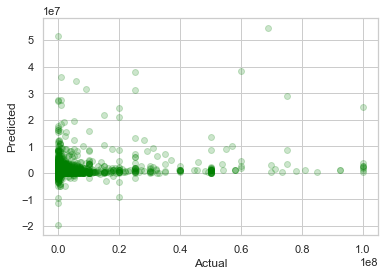

In [16]:
plt.scatter(y_test, y_pred, c='green', alpha=0.2)
plt.xlabel("Actual")
plt.ylabel("Predicted")

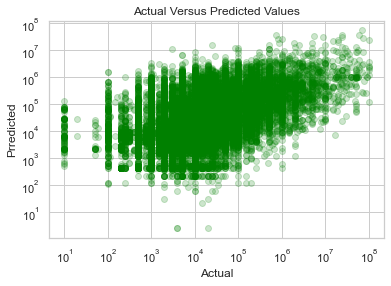

In [17]:
plt.scatter(y_test, y_pred, color = 'green', alpha=0.2)
plt.title('Actual Versus Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Prredicted')
plt.xscale("log")
plt.yscale("log")
plt.show()

23


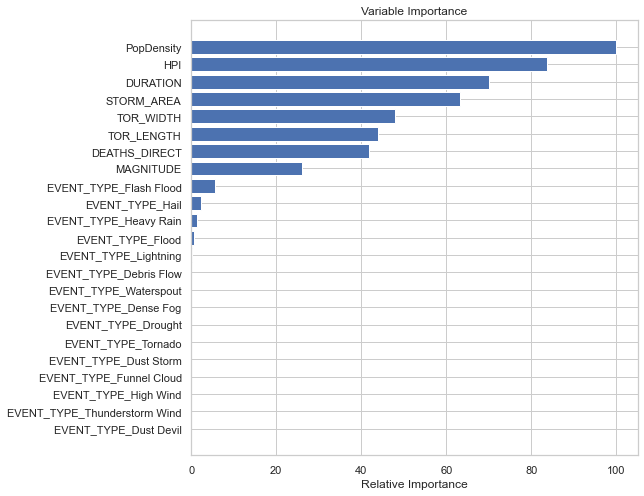

In [18]:
feature_importance = lgbm.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(8,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# <font color='orange'>XGBoost</font>


# define the model
xgbr = XGBRegressor(random_state=1234)
xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_train)
print('TRAIN:')
print('MAE: ', f"{mean_absolute_error(y_train, y_pred):,.1f}")
print('MSE: ', f"{mean_squared_error(y_train, y_pred):,.1f}")
print('RMSE:', f"{np.sqrt(mean_squared_error(y_train, y_pred)):,.1f}")
print('MAPE: ', f"{mean_absolute_percentage_error(y_train, y_pred):,.1f}")
train_mae = mean_absolute_error(y_train, y_pred)

print("")
y_pred = xgbr.predict(X_test)
print('TEST:')
print('MAE: ', f"{mean_absolute_error(y_test, y_pred):,.1f}")
print('MSE: ', f"{mean_squared_error(y_test, y_pred):,.1f}")
print('RMSE:', f"{np.sqrt(mean_squared_error(y_test, y_pred)):,.1f}")
print('MAPE: ', f"{mean_absolute_percentage_error(y_test, y_pred):,.1f}")
test_mae = mean_absolute_error(y_test, y_pred)

print("")
print('MAE DIFF:', f"{((test_mae / train_mae) - 1):.0%}")

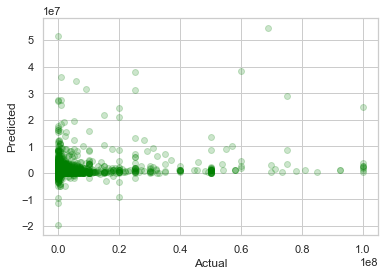

In [19]:
plt.scatter(y_test, y_pred, c='green', alpha=0.2)
plt.xlabel("Actual")
plt.ylabel("Predicted");

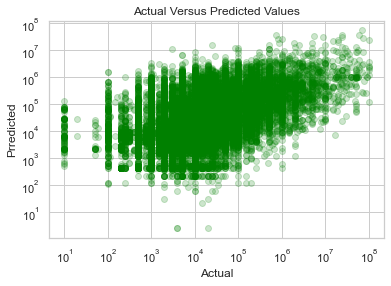

In [20]:
plt.scatter(y_test, y_pred, color = 'green', alpha=0.2)
plt.title('Actual Versus Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Prredicted')
plt.xscale("log")
plt.yscale("log")
plt.show();

feature_importance = xgbr.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(8,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

param_grid = {
    'learning_rate': [0.1, 0.3, 0.6, 0.9],
    'max_depth': [2, 6, 9, 11],
    'num_leaves': [50, 100, 150],
}

In [21]:
param_grid = {
    'learning_rate': [0.1, 0.3, 0.9],
    'max_depth': [4, 6, 8],
    'n_estimators': [50, 100, 150],
}

[LightGBM] [Warning] Unknown parameter: criterion
[LightGBM] [Warning] Unknown parameter: max_leaf_nodes

In [22]:
# markdown since it takes so long to run
# random_search = RandomizedSearchCV(XGBRegressor(random_state=1234),
#                                    param_grid, n_jobs=-1)
# random_search.fit(X_train, y_train.values.ravel())
# print(random_search.best_estimator_)

output run 1 of random search:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1234, ...)
    

# define the model
xgbr = XGBRegressor(learning_rate = 0.1, max_depth = 8, n_estimators = 100, random_state=1234)
xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_train)
print('TRAIN:')
print('MAE: ', f"{mean_absolute_error(y_train, y_pred):,.1f}")
print('MSE: ', f"{mean_squared_error(y_train, y_pred):,.1f}")
print('RMSE:', f"{np.sqrt(mean_squared_error(y_train, y_pred)):,.1f}")
print('MAPE: ', f"{mean_absolute_percentage_error(y_train, y_pred):,.1f}")
train_mae = mean_absolute_error(y_train, y_pred)

print("")
y_pred = xgbr.predict(X_test)
print('TEST:')
print('MAE: ', f"{mean_absolute_error(y_test, y_pred):,.1f}")
print('MSE: ', f"{mean_squared_error(y_test, y_pred):,.1f}")
print('RMSE:', f"{np.sqrt(mean_squared_error(y_test, y_pred)):,.1f}")
print('MAPE: ', f"{mean_absolute_percentage_error(y_test, y_pred):,.1f}")
test_mae = mean_absolute_error(y_test, y_pred)

print("")
print('MAE DIFF:', f"{((test_mae / train_mae) - 1):.0%}")

original scores:
- MAE:  119384.45039813573
- MSE:  2176802822383.6873
- RMSE: 1475399.207802311

Comment: we can see that the tuning did improve the performance of the model

xgbr2 = XGBRegressor(eval_metric="rmse", early_stopping_rounds=10, random_state=1234)
eval_set = [(X_test, y_test)]
xgbr2.fit(X_train, y_train, eval_set=eval_set, verbose=True)

# make predictions for test data
y_pred = xgbr2.predict(X_test)
print('TRAIN:')
print('MAE: ', f"{mean_absolute_error(y_train, y_pred):,.1f}")
print('MSE: ', f"{mean_squared_error(y_train, y_pred):,.1f}")
print('RMSE:', f"{np.sqrt(mean_squared_error(y_train, y_pred)):,.1f}")
print('MAPE: ', f"{mean_absolute_percentage_error(y_train, y_pred):,.1f}")
train_mae = mean_absolute_error(y_train, y_pred)

print("")
y_pred = xgbr2.predict(X_test)
print('TEST:')
print('MAE: ', f"{mean_absolute_error(y_test, y_pred):,.1f}")
print('MSE: ', f"{mean_squared_error(y_test, y_pred):,.1f}")
print('RMSE:', f"{np.sqrt(mean_squared_error(y_test, y_pred)):,.1f}")
print('MAPE: ', f"{mean_absolute_percentage_error(y_test, y_pred):,.1f}")
test_mae = mean_absolute_error(y_test, y_pred)

print("")
print('MAE DIFF:', f"{((test_mae / train_mae) - 1):.0%}")

first run with stopping:
- MAE:  119384.45039813573
- MSE:  2176802822383.6873
- RMSE: 1475399.207802311


### QUESTION: how to detect overfitting with regression models? random forest regression/boost algos?

- compare test / train metrics

However, for linear regression, there is an excellent accelerated cross-validation method called predicted R-squared. This method doesn’t require you to collect a separate sample or partition your data, and you can obtain the cross-validated results as you fit the model

# <font color='orange'>Tweedie Regression</font>


steps:
- Note: filter out claims with zero amount, as the severity model requires strictly positive target values.
- Correct for unreasonable observations (that might be data error) and a few exceptionally large claim amounts
    

In [23]:
# load the data - this dataset has the zeroes eliminated
X_train = pd.read_parquet("../Data/X_train_td.pqt")
X_test = pd.read_parquet("../Data/X_test_td.pqt")
y_train = pd.read_parquet("../Data/y_train_td.pqt") 
y_test = pd.read_parquet("../Data/y_test_td.pqt")


X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

# , index_col =[0]
# load data
#df = pd.read_parquet("../Data/all_storm_data11.pqt")
#df = pd.read_csv("../Data/all_storm_data4.csv")

In [24]:
# y_train = y_train.reset_index(drop=True)
# y_test = y_test.reset_index(drop=True)
# X_train = X_train.reset_index(drop=True)
# X_test = X_test.reset_index(drop=True)

In [25]:
len(X_train), len(X_test), len(y_train), len(y_test)

(191915, 47979, 191915, 47979)

In [26]:
# tdrg = linear_model.TweedieRegressor(max_iter=500)
tdrg = TweedieRegressor(max_iter=500)
tdrg.fit(X_train, y_train.values.ravel())





TweedieRegressor(max_iter=500)

In [27]:
len(y_pred)

150926

In [28]:
# make predictions for test data
y_pred = tdrg.predict(X_train)
print('TRAIN:')
print('MAE: ', f"{mean_absolute_error(y_train, y_pred):,.1f}")
print('MSE: ', f"{mean_squared_error(y_train, y_pred):,.1f}")
print('RMSE:', f"{np.sqrt(mean_squared_error(y_train, y_pred)):,.1f}")
print('MAPE: ', f"{mean_absolute_percentage_error(y_train, y_pred):,.1f}")
train_mae = mean_absolute_error(y_train, y_pred)

print("")
y_pred = tdrg.predict(X_test)
print('TEST:')
print('MAE: ', f"{mean_absolute_error(y_test, y_pred):,.1f}")
print('MSE: ', f"{mean_squared_error(y_test, y_pred):,.1f}")
print('RMSE:', f"{np.sqrt(mean_squared_error(y_test, y_pred)):,.1f}")
print('MAPE: ', f"{mean_absolute_percentage_error(y_test, y_pred):,.1f}")
test_mae = mean_absolute_error(y_test, y_pred)

print("")
print('MAE DIFF:', f"{((test_mae / train_mae) - 1):.0%}")

TRAIN:
MAE:  344,988.1
MSE:  6,214,697,830,433.1
RMSE: 2,492,929.6
MAPE:  146.5

TEST:
MAE:  353,252.9
MSE:  6,404,869,387,973.0
RMSE: 2,530,784.3
MAPE:  143.4

MAE DIFF: 2%


Text(0, 0.5, 'Predicted')

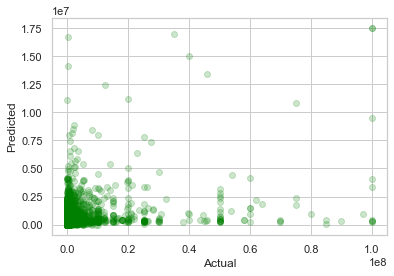

In [29]:
plt.scatter(y_test, y_pred, c='green', alpha=0.2)
plt.xlabel("Actual")
plt.ylabel("Predicted")

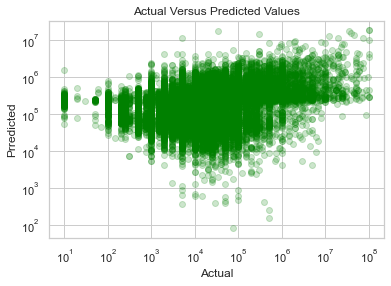

In [30]:
plt.scatter(y_test, y_pred, color = 'green', alpha=0.2)
plt.title('Actual Versus Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Prredicted')
plt.xscale("log")
plt.yscale("log")
plt.show()

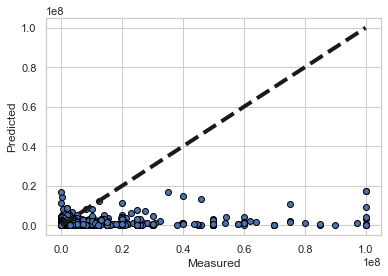

In [31]:
# plot to see if tweedie regressor follows a linear regression - it does not
fig, ax = plt.subplots()
ax.scatter(y_test,y_pred,edgecolors=(0,0,0))
ax.plot([y.min(),y.max()],[y.min(),y.max()], 'k--',lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

Note: 'TweedieRegressor' object has no attribute 'feature_importances_'

param_grid = {
    'power': [0, 1, 2, 3],
    'link': ['auto', 'identity', 'log'],
    'solver': ['lbfgs', 'newton-cholesky'],
    'max_iter': [50, 100, 150]
}

In [32]:
param_grid = {
    'power': [0, 1, 2, 3],
    'max_iter': [50, 100, 150, 200, 250, 500, 1000, 1500]
}

In [33]:
# markdown since it takes so long to run
# random_search = RandomizedSearchCV(linear_model.TweedieRegressor(),
#                                    param_grid, n_jobs=-1)
# random_search.fit(X_train, y_train.values.ravel())
# print(random_search.best_estimator_)

output:

TweedieRegressor(link='log', power=2)
    

# question: had very different values when changing power from 0, 1, 2, 3, 4 (the different distribution types) - is this how to tweak this model?

In [34]:
# tdrg = linear_model.TweedieRegressor(max_iter=500)
tdrg = TweedieRegressor(link='log', power=2, max_iter=50)
tdrg.fit(X_train, y_train.values.ravel())

TweedieRegressor(link='log', max_iter=50, power=2)

In [35]:
# make predictions for test data
y_pred = tdrg.predict(X_train),
print('TRAIN:')
print('MAE: ', f"{mean_absolute_error(y_train, y_pred):,.1f}")
print('MSE: ', f"{mean_squared_error(y_train, y_pred):,.1f}")
print('RMSE:', f"{np.sqrt(mean_squared_error(y_train, y_pred)):,.1f}")
print('MAPE: ', f"{mean_absolute_percentage_error(y_train, y_pred):,.1f}")
train_mae = mean_absolute_error(y_train, y_pred)

print("")
y_pred = tdrg.predict(X_test)
print('TEST:')
print('MAE: ', f"{mean_absolute_error(y_test, y_pred):,.1f}")
print('MSE: ', f"{mean_squared_error(y_test, y_pred):,.1f}")
print('RMSE:', f"{np.sqrt(mean_squared_error(y_test, y_pred)):,.1f}")
print('MAPE: ', f"{mean_absolute_percentage_error(y_test, y_pred):,.1f}")
test_mae = mean_absolute_error(y_test, y_pred)

print("")
print('MAE DIFF:', f"{((test_mae / train_mae) - 1):.0%}")

TRAIN:


ValueError: Found input variables with inconsistent numbers of samples: [191915, 1]

In [ ]:
plt.scatter(y_test, y_pred, c='green', alpha=0.2)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [ ]:
plt.scatter(y_test, y_pred, color = 'green', alpha=0.2)
plt.title('Actual Versus Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Prredicted')
plt.xscale("log")
plt.yscale("log")
plt.show()

## try doing light GBM model with a tweedie objective 

https://medium.com/@wardarahim25/modelling-insurance-claims-data-using-the-tweedie-approach-94db8b14bfb5

##  <font color='red'>Scratch</font>


## WORKING, MARKDOWN UNTIL FINAL


code looks good; 

use either 
randomsearch cv
gridserarch cv
hyparamter tune




#### Using k-fold cross-validation

lgbm2 = LGBMRegressor(learning_rate=0.09,max_depth=-5,random_state=1234)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1234)

n_scores = cross_val_score(lgbm2, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

First run output:
MAE: -374840.173 (59982.424)


print(lgbm2.score(X_train, y_train))

scratch on LGBM Model


# loading data
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# fitting the model
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)

# prediction
y_pred = model.predict(X_test)

# accuracy check
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 
 


# plotting feature importance
lgb.plot_importance(model, height=.5)

# example: https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/simple_example.py

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=5)])

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
rmse_test = mean_squared_error(y_test, y_pred) ** 0.5
print(f'The RMSE of prediction is: {rmse_test}')

Light GBM hyperparameter tuning: 
    
There are many hyperparameters we can look at for LightGBM, although in this case, we will look at the number of trees and tree depth, the learning rate, and the boosting type

# Explore Number of Trees
# get a list of models to evaluate
def get_models():
 models = dict()
 trees = [10, 50, 100, 500, 1000, 5000]
 for n in trees:
 models[str(n)] = LGBMClassifier(n_estimators=n)
 return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#Explore Tree Depth
# get a list of models to evaluate
def get_models():
 models = dict()
 for i in range(1,11):
 models[str(i)] = LGBMClassifier(max_depth=i, num_leaves=2**i)
 return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()



# Explore Learning Rate
# get a list of models to evaluate
def get_models():
 models = dict()
 rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
 for r in rates:
 key = '%.4f' % r
 models[key] = LGBMClassifier(learning_rate=r)
 return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

lgbm = LGBMRegressor(learning_rate=0.09,max_depth=-5,random_state=1234)
lgbm.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

y_pred = lgbm.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print(lgbm.score(X_train, y_train))

play with some different learning rates

lgbm = LGBMRegressor(learning_rate=0.05,max_depth=-5,random_state=1234)
lgbm.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

y_pred = lgbm.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print(lgbm.score(X_train, y_train))

In [ ]:
# defining parameters
params = {
    'task': 'train', 
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rate': 0.05,
    'metric': 'l2',
    'verbose': -1
}

In [ ]:
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}

In [ ]:
#gbm = lgb.LGBMRegressor(params)
lgbm3 = lgb.LGBMRegressor(**params,random_state=1234)
lgbm3.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

# define the model
lgbm3 = LGBMRegressor(**params, random_state=1234)
lgbm3.fit(X_train, y_train)

y_pred = lgbm3.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print(lgbm.score(X_train, y_train))

for dimensionality reduction:
    lasso, ridge